# 🎬 Netflix Movies and TV Shows – Exploratory Data Analysis (EDA)

In this project, we explore the Netflix dataset to uncover trends and insights about the types of content available on the platform.

We'll answer:
- What type of content dominates Netflix?
- How has Netflix's content grown over time?
- Which countries contribute the most?
- What are the most common genres?

🔧 **Tools Used**: Python, Pandas, Matplotlib, Seaborn


## 📥 Step 1: Load the Dataset

We begin by loading the Netflix dataset from Kaggle into a Pandas DataFrame for analysis.


In [1]:
import pandas as pd

# Load the Netflix dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Display the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Step 2: Data Exploration and Cleaning

Before diving into analysis, let’s understand the dataset:
- How many entries does it have?
- Are there any missing values?
- What are the data types of each column?

We’ll also clean any missing or inconsistent values.


In [2]:
# Basic info
df.info()

# Check for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Get basic stats for object columns
print("\nUnique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values in each column:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in

### 🧼 Data Cleaning

- Convert `date_added` to datetime format.
- Create a new `year_added` column.
- Handle missing values in `director`, `cast`, `country`, `rating`, and `duration`.


In [3]:
# Convert 'date_added' to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Create a new column: year content was added to Netflix
df['year_added'] = df['date_added'].dt.year

# Drop rows with missing 'rating' or 'duration'
df.dropna(subset=['rating', 'duration'], inplace=True)

# Fill missing values with 'Unknown'
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')
df['country'].fillna('Unknown')

# Check missing values again
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2631
cast,825
country,830
date_added,10
release_year,0
rating,0
duration,0


In [4]:
# Drop rows where 'date_added' is still missing
df.dropna(subset=['date_added'], inplace=True)


## 📊 Step 3: Exploratory Data Analysis (EDA)

Let’s now dive into analyzing patterns and trends in Netflix content.


### 📊 Content Type Distribution

Let’s visualize how many **Movies** and **TV Shows** are on Netflix.


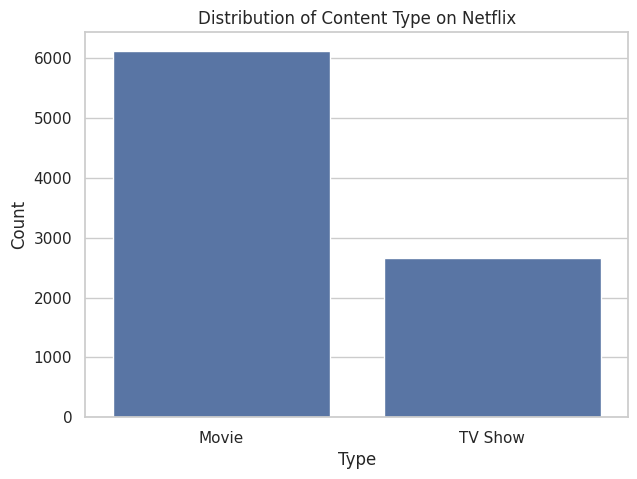

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme
sns.set(style="whitegrid")

# Plot type counts
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### 📅 Netflix Content Added Over the Years

Now let’s analyze how Netflix has grown by visualizing how many movies and TV shows were added each year.


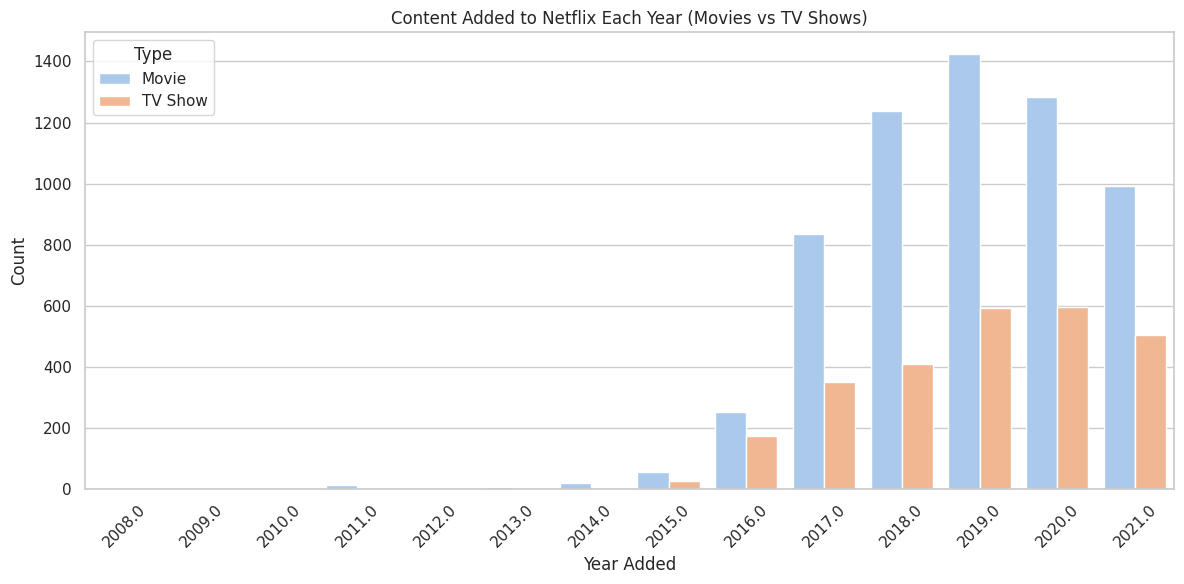

In [6]:
# Plot number of content items added each year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='type', palette='pastel')
plt.title('Content Added to Netflix Each Year (Movies vs TV Shows)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


### 🌍 Top Countries Producing Netflix Content

Let’s find out which countries contribute the most content to Netflix. We'll extract the top 10 and visualize them.


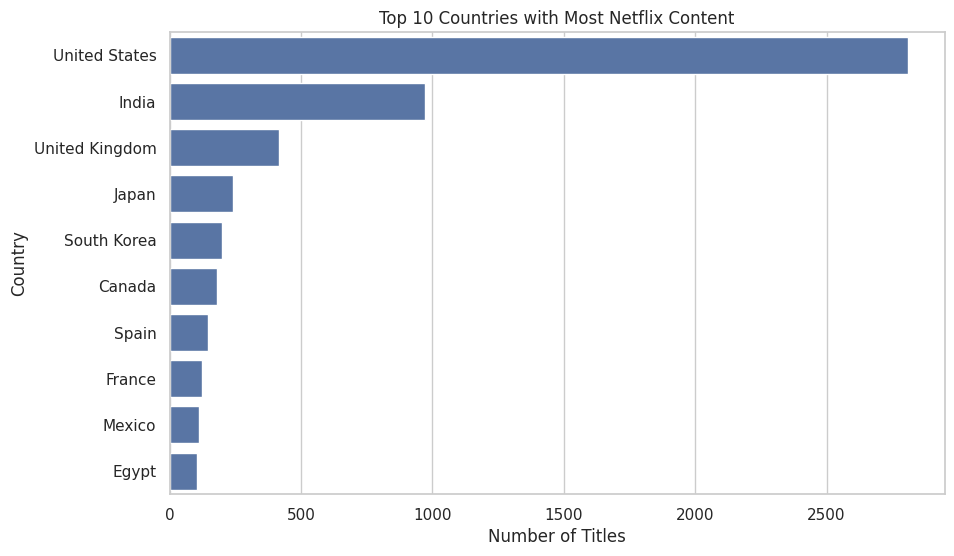

In [7]:
# Group by country and get top 10
top_countries = df['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


### 🎭 Most Popular Genres on Netflix

We’ll analyze the most frequently occurring genres listed under `listed_in`. Each title can belong to multiple genres, so we’ll split them and count.


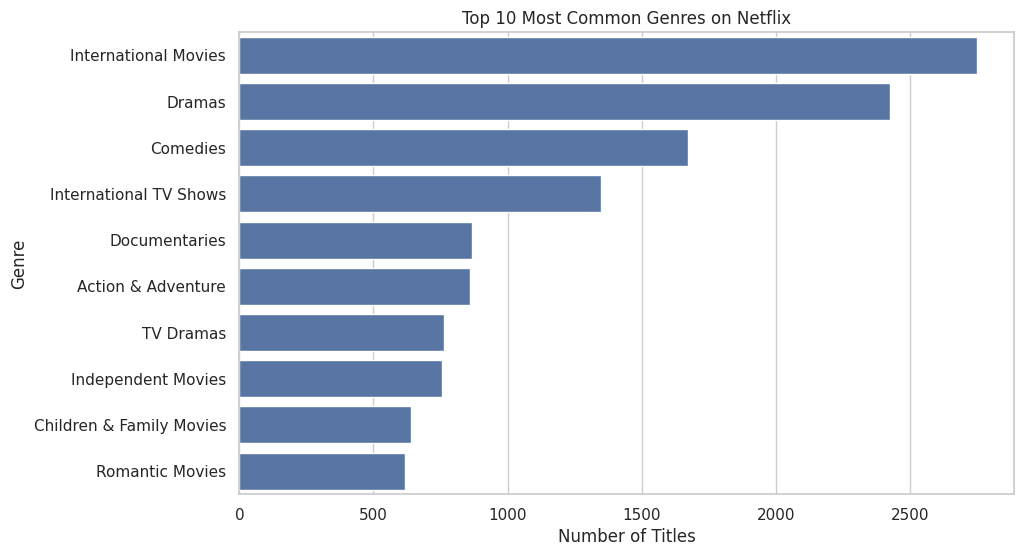

In [8]:
from collections import Counter

# Split genres and count each one individually
genre_series = df['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


## ✅ Netflix Data Analysis – Summary

In this project, I performed exploratory data analysis on the Netflix dataset to uncover key insights about the platform's content:

### 🔍 Key Insights:
- **Content Type**: Movies dominate Netflix's library compared to TV Shows.
- **Growth Over Time**: Massive spike in content additions between 2016–2021.
- **Top Producing Countries**: United States leads, followed by India and the UK.
- **Popular Genres**: Dramas, Documentaries, and Comedies are the most common.

### 🛠 Tools & Skills Used:
- **Python (Pandas, Matplotlib, Seaborn)**
- **Data Cleaning & Preprocessing**
- **Visualization & Insight Extraction**
